In [ ]:
# Transaction Monitoring & Suspicious Activity Detection Project


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)


In [3]:
np.random.seed(42)

n = 1000

data = pd.DataFrame({
    "transaction_id": range(1, n + 1),
    "customer_id": np.random.randint(1000, 1100, n),
    "transaction_date": pd.to_datetime("2025-01-01") +
                        pd.to_timedelta(np.random.randint(0, 30, n), unit="D"),
    "amount": np.random.exponential(scale=300000, size=n).round(2),
    "transaction_type": np.random.choice(
        ["cash", "transfer", "mobile", "international"], n, p=[0.3, 0.4, 0.2, 0.1]
    ),
    "country": np.random.choice(
        ["Kenya", "Uganda", "Tanzania", "HighRiskCountry1", "HighRiskCountry2"],
        n,
        p=[0.7, 0.1, 0.1, 0.05, 0.05]
    ),
    "is_pep": np.random.choice([0, 1], n, p=[0.95, 0.05])
})

data.head()


,transaction_id,customer_id,transaction_date,amount,transaction_type,country,is_pep
0,1,1051,2025-01-02,125506.83,cash,Kenya,0
1,2,1092,2025-01-15,300409.11,cash,Kenya,0
2,3,1014,2025-01-08,806598.29,transfer,Kenya,0
3,4,1071,2025-01-08,32445.90,transfer,Kenya,0
4,5,1060,2025-01-17,830476.18,international,Kenya,0


In [4]:
data["large_cash_flag"] = np.where(
    (data["transaction_type"] == "cash") & (data["amount"] > 1_000_000),
    1,
    0
)


In [5]:
high_risk_countries = ["HighRiskCountry1", "HighRiskCountry2"]

data["high_risk_country_flag"] = np.where(
    data["country"].isin(high_risk_countries),
    1,
    0
)


In [6]:
data["pep_flag"] = np.where(
    (data["is_pep"] == 1) & (data["amount"] > 500_000),
    1,
    0
)


In [8]:
data["structuring_flag"] = 0

data["risk_score"] = (
    data["large_cash_flag"] * 3 +
    data["structuring_flag"] * 4 +
    data["high_risk_country_flag"] * 3 +
    data["pep_flag"] * 5
)

data["risk_level"] = np.where(
    data["risk_score"] >= 5,
    "High Risk",
    "Low/Medium Risk"
)

In [9]:
suspicious_transactions = data[data["risk_level"] == "High Risk"]

suspicious_transactions.head()


,transaction_id,customer_id,transaction_date,amount,transaction_type,country,is_pep,large_cash_flag,high_risk_country_flag,pep_flag,structuring_flag,risk_score,risk_level
90,91,1071,2025-01-11,590096.25,transfer,Kenya,1,0,0,1,0,5,High Risk
378,379,1094,2025-01-24,690844.91,transfer,Kenya,1,0,0,1,0,5,High Risk
580,581,1067,2025-01-04,558057.27,cash,Uganda,1,0,0,1,0,5,High Risk
725,726,1084,2025-01-08,951551.02,international,Kenya,1,0,0,1,0,5,High Risk
841,842,1033,2025-01-09,828541.94,transfer,Kenya,1,0,0,1,0,5,High Risk


In [10]:
summary = {
    "Total Transactions": len(data),
    "Suspicious Transactions": len(suspicious_transactions),
    "Percentage Flagged (%)": round(len(suspicious_transactions) / len(data) * 100, 2)
}

summary


{'Total Transactions': 1000,
 'Suspicious Transactions': 9,
 'Percentage Flagged (%)': 0.9}

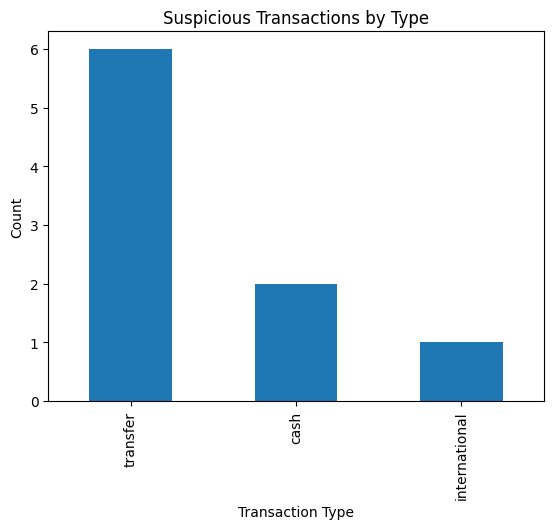

In [11]:
plt.figure()
suspicious_transactions["transaction_type"].value_counts().plot(kind="bar")
plt.title("Suspicious Transactions by Type")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()


In [12]:
suspicious_transactions.to_csv(
    "suspicious_transactions.csv", index=False
)

print("Export complete: suspicious_transactions.csv")


Export complete: suspicious_transactions.csv
